# Modules import

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import classification_report, confusion_matrix

# Connect Drive FS


In [132]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Load csv

In [133]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/utrechthousinghuge.csv')

# Drop duplicates

In [134]:
df.shape

(2499, 16)

In [135]:
df.drop_duplicates()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,9001,3520,35.1,14.2,499,147,406,1,2192,5470,1978,2,173100,232000,0,0
1,9002,3520,22.2,18.2,404,109,328,1,2059,5228,1981,1,136000,184000,0,1
2,9003,3520,59.7,11.8,704,89,629,1,2243,5388,1972,1,169000,230000,0,0
3,9004,3520,39.0,18.6,726,130,669,1,2050,5432,1970,2,196900,257000,0,0
4,9005,3520,44.2,18.1,800,160,750,0,2138,5110,1978,2,226000,286000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,11495,3520,69.7,14.3,996,90,936,0,2212,5225,1981,1,213400,276000,0,0
2495,11496,3520,40.6,14.7,597,104,521,0,2246,5068,1974,1,162000,214000,0,0
2496,11497,3520,40.5,11.3,458,140,361,1,2118,5308,1985,2,162700,218000,0,0
2497,11498,3520,6.6,17.2,113,154,25,0,2121,5381,1975,2,119400,173000,0,0


In [136]:
df.shape

(2499, 16)

# Data view

In [137]:
df.describe()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.00000
mean,10250.000000,3592.691076,34.997919,14.989396,506.726691,138.014406,431.547819,0.737095,2567.934774,5499.337735,1992.401361,1.278912,170083.953581,219054.821929,0.284114,0.20008
std,721.543484,119.141675,23.414357,2.898106,319.793785,42.984094,320.229223,0.528708,256.478469,288.795227,10.794545,0.448554,74934.022024,81895.336086,0.451081,0.40014
min,9001.000000,3520.000000,5.600000,10.000000,110.000000,80.000000,10.000000,0.000000,2000.000000,5000.000000,1970.000000,1.000000,64500.000000,91000.000000,0.000000,0.00000
25%,9625.500000,3520.000000,11.500000,12.500000,148.000000,103.000000,83.000000,0.000000,2389.000000,5259.000000,1983.000000,1.000000,91300.000000,137000.000000,0.000000,0.00000
50%,10250.000000,3525.000000,33.200000,14.900000,513.000000,128.000000,436.000000,1.000000,2601.000000,5492.000000,1996.000000,1.000000,164800.000000,212000.000000,0.000000,0.00000
75%,10874.500000,3528.000000,51.950000,17.500000,771.500000,164.000000,699.000000,1.000000,2768.500000,5749.000000,2001.000000,2.000000,225800.000000,282000.000000,1.000000,0.00000
max,11499.000000,3800.000000,116.600000,20.000000,1200.000000,250.000000,1144.000000,2.000000,3000.000000,6000.000000,2010.000000,2.000000,357800.000000,435000.000000,1.000000,1.00000


In [138]:
df.head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,9001,3520,35.1,14.2,499,147,406,1,2192,5470,1978,2,173100,232000,0,0
1,9002,3520,22.2,18.2,404,109,328,1,2059,5228,1981,1,136000,184000,0,1
2,9003,3520,59.7,11.8,704,89,629,1,2243,5388,1972,1,169000,230000,0,0
3,9004,3520,39.0,18.6,726,130,669,1,2050,5432,1970,2,196900,257000,0,0
4,9005,3520,44.2,18.1,800,160,750,0,2138,5110,1978,2,226000,286000,0,0


In [139]:
df.tail()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
2494,11495,3520,69.7,14.3,996,90,936,0,2212,5225,1981,1,213400,276000,0,0
2495,11496,3520,40.6,14.7,597,104,521,0,2246,5068,1974,1,162000,214000,0,0
2496,11497,3520,40.5,11.3,458,140,361,1,2118,5308,1985,2,162700,218000,0,0
2497,11498,3520,6.6,17.2,113,154,25,0,2121,5381,1975,2,119400,173000,0,0
2498,11499,3525,39.2,16.8,658,144,591,1,2838,5747,2002,1,190100,223000,0,1


# Dropping NA variables

In [140]:
df.dropna(inplace = True)

In [141]:
df.shape

(2499, 16)

# Missing Data

In [142]:
print("")
print("Isnull:")
print(df.isnull().sum())


Isnull:
id             0
zipcode        0
lot-len        0
lot-width      0
lot-area       0
house-area     0
garden-size    0
balcony        0
x-coor         0
y-coor         0
buildyear      0
bathrooms      0
taxvalue       0
retailvalue    0
energy-eff     0
monument       0
dtype: int64


# Not unique data

In [143]:
print("")
print("Nunique:")
print(df.nunique())
print("")


Nunique:
id             2499
zipcode           4
lot-len         736
lot-width       101
lot-area        881
house-area      170
garden-size     907
balcony           3
x-coor          883
y-coor          927
buildyear        41
bathrooms         2
taxvalue       1380
retailvalue     325
energy-eff        2
monument          2
dtype: int64



# Putting property_value(price) in the first column

In [144]:
columns = list(df.columns)

columns.remove('retailvalue')
columns.insert(0,'retailvalue')
df = df[columns]

In [145]:
df = df.drop(columns=['id'])

In [146]:
df.head()

,retailvalue,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,energy-eff,monument
0,232000,3520,35.1,14.2,499,147,406,1,2192,5470,1978,2,173100,0,0
1,184000,3520,22.2,18.2,404,109,328,1,2059,5228,1981,1,136000,0,1
2,230000,3520,59.7,11.8,704,89,629,1,2243,5388,1972,1,169000,0,0
3,257000,3520,39.0,18.6,726,130,669,1,2050,5432,1970,2,196900,0,0
4,286000,3520,44.2,18.1,800,160,750,0,2138,5110,1978,2,226000,0,0


In [147]:
df.describe()


,retailvalue,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,energy-eff,monument
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.00000
mean,219054.821929,3592.691076,34.997919,14.989396,506.726691,138.014406,431.547819,0.737095,2567.934774,5499.337735,1992.401361,1.278912,170083.953581,0.284114,0.20008
std,81895.336086,119.141675,23.414357,2.898106,319.793785,42.984094,320.229223,0.528708,256.478469,288.795227,10.794545,0.448554,74934.022024,0.451081,0.40014
min,91000.000000,3520.000000,5.600000,10.000000,110.000000,80.000000,10.000000,0.000000,2000.000000,5000.000000,1970.000000,1.000000,64500.000000,0.000000,0.00000
25%,137000.000000,3520.000000,11.500000,12.500000,148.000000,103.000000,83.000000,0.000000,2389.000000,5259.000000,1983.000000,1.000000,91300.000000,0.000000,0.00000
50%,212000.000000,3525.000000,33.200000,14.900000,513.000000,128.000000,436.000000,1.000000,2601.000000,5492.000000,1996.000000,1.000000,164800.000000,0.000000,0.00000
75%,282000.000000,3528.000000,51.950000,17.500000,771.500000,164.000000,699.000000,1.000000,2768.500000,5749.000000,2001.000000,2.000000,225800.000000,1.000000,0.00000
max,435000.000000,3800.000000,116.600000,20.000000,1200.000000,250.000000,1144.000000,2.000000,3000.000000,6000.000000,2010.000000,2.000000,357800.000000,1.000000,1.00000


#Show Correlation matrix

In [148]:
df.corr()

,retailvalue,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,energy-eff,monument
retailvalue,1.000000,0.727055,0.876142,0.032310,0.934471,0.777607,0.933547,0.002792,0.265028,-0.564726,-0.006575,0.362596,0.992432,-0.508410,0.335244
zipcode,0.727055,1.000000,0.552091,0.009575,0.584866,0.640782,0.583501,0.249238,0.542307,-0.476225,0.416411,0.283680,0.737595,-0.180222,0.274834
lot-len,0.876142,0.552091,1.000000,-0.263028,0.934180,0.519426,0.932831,-0.055895,0.214067,-0.462769,-0.079273,0.262722,0.878182,-0.410146,0.293774
lot-width,0.032310,0.009575,-0.263028,1.000000,0.037705,0.014761,0.037915,0.009101,-0.000263,-0.015968,-0.014181,0.034488,0.031168,-0.032083,0.000035
lot-area,0.934471,0.584866,0.934180,0.037705,1.000000,0.548739,0.998964,-0.054983,0.225003,-0.493892,-0.086129,0.286443,0.936547,-0.436499,0.311521
house-area,0.777607,0.640782,0.519426,0.014761,0.548739,1.000000,0.548194,0.045244,0.412740,-0.295784,0.195103,0.407842,0.796189,-0.495478,0.295703
garden-size,0.933547,0.583501,0.932831,0.037915,0.998964,0.548194,1.000000,-0.055489,0.223619,-0.494278,-0.086810,0.286144,0.935516,-0.437192,0.310321
balcony,0.002792,0.249238,-0.055895,0.009101,-0.054983,0.045244,-0.055489,1.000000,0.173777,0.016386,0.327478,-0.023219,-0.000877,0.210932,0.159806
x-coor,0.265028,0.542307,0.214067,-0.000263,0.225003,0.412740,0.223619,0.173777,1.000000,0.161565,0.591840,0.159873,0.342308,0.046046,0.151136
y-coor,-0.564726,-0.476225,-0.462769,-0.015968,-0.493892,-0.295784,-0.494278,0.016386,0.161565,1.000000,0.310804,-0.173266,-0.517390,0.376495,-0.184379


# Correlation Matrix Plot


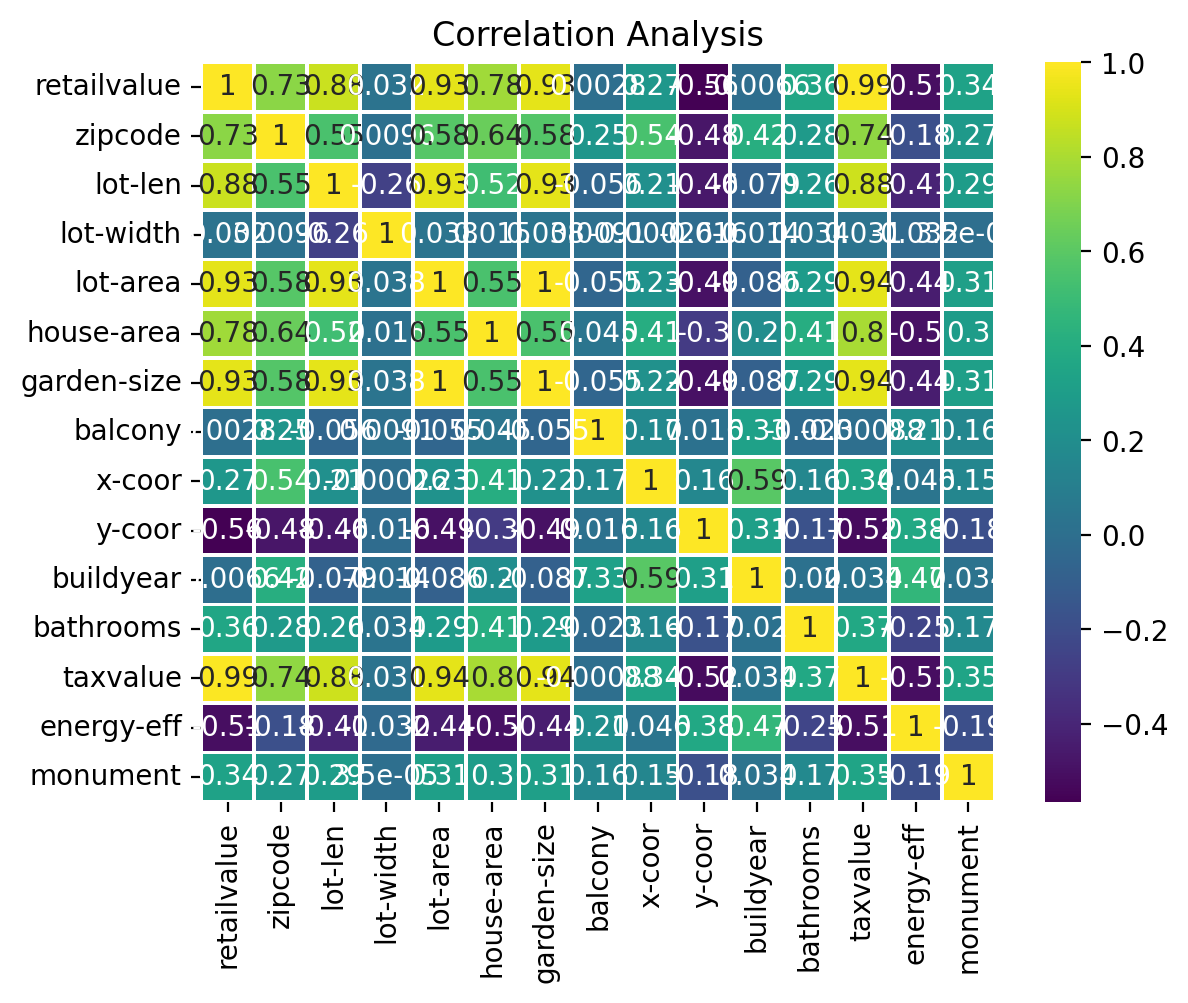

In [149]:
plt.figure(dpi=200)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(),annot=True,lw=1,linecolor='white',cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
#X lot-area 0.93 y retailvalue
#X lot-area taxvalue 0.99 y retailvalue

# Check attribute correlation for choosing X

In [150]:
print(df.corr()["retailvalue"].sort_values(ascending=False))
print("")

retailvalue    1.000000
taxvalue       0.992432
lot-area       0.934471
garden-size    0.933547
lot-len        0.876142
house-area     0.777607
zipcode        0.727055
bathrooms      0.362596
monument       0.335244
x-coor         0.265028
lot-width      0.032310
balcony        0.002792
buildyear     -0.006575
energy-eff    -0.508410
y-coor        -0.564726
Name: retailvalue, dtype: float64



# Univariate Linear Regression 


In [151]:
y = df.iloc[:,0].values # target

X = df[['lot-area']] # predictor 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [152]:
time0 = time.time()

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred= regressor.predict(X_test)

print("intercept_:",regressor.intercept_)
print("coef_:",regressor.coef_)

print("")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 : ', metrics.r2_score(y_test, y_pred))


time1 = time.time()
print("Time: ",time1-time0)

intercept_: 98657.36787337426
coef_: [237.51031368]

MAE:  21909.238986809483
MSE:  805103008.1358398
RMSE:  28374.337140025666
R^2 :  0.8839326089985096
Time:  0.015860319137573242


# Plot Linear Regression

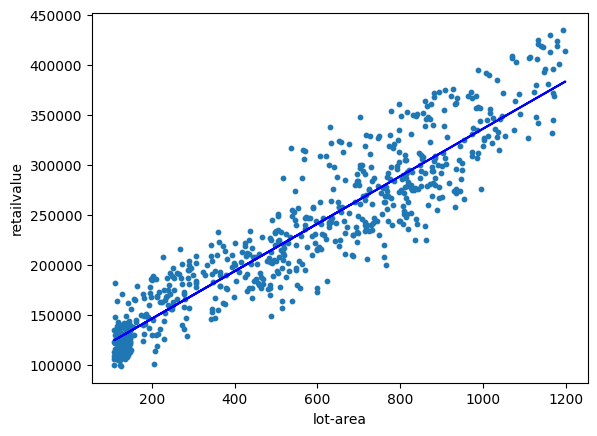

In [153]:
plt.scatter(X_test, y_test, s=10)
plt.xlabel('lot-area')
plt.ylabel('retailvalue')

plt.plot(X_test, y_pred, color='b')
plt.show()

# Bivariate Linear Regression

In [154]:
X = df[['lot-area','taxvalue']] # predictor
y = df['retailvalue']
#y = df.iloc[:,0].values # target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [155]:
time0 = time.time()

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred= regressor.predict(X_test)

print("intercept_:",regressor.intercept_)
print("coef_:",regressor.coef_)

print("")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 : ', metrics.r2_score(y_test, y_pred))


time1 = time.time()
print("Time: ",time1-time0)

intercept_: 36138.6460388875
coef_: [9.34678258 1.04713042]

MAE:  7750.045887029295
MSE:  100277548.10319632
RMSE:  10013.867789380702
R^2 :  0.9855435226713242
Time:  0.01605081558227539


# Plot Bivariate Regression

In [156]:
X = df[['lot-area','taxvalue']].values.reshape(-1,2) # predictor
Y = df['retailvalue']

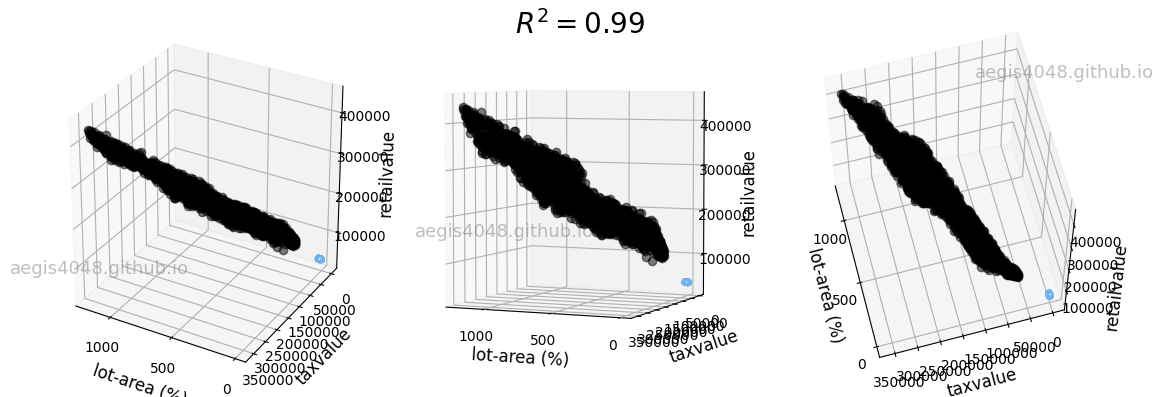

In [157]:
#3d LINEAR BI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
#X = df[['land_size_sqm','house_size_sqm']] # predictor 

#y = df.iloc[:,0].values # target

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('lot-area (%)', fontsize=12)
    ax.set_ylabel('taxvalue', fontsize=12)
    ax.set_zlabel('retailvalue', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()





# Univariate Polynomial Regression 

# Select features

In [158]:
X = df[['lot-area']] # predictor

y = df.iloc[:,0].values # target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Degree 2

In [159]:
time0 = time.time()

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 2)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  2
intercept_: 96568.61491507164
coef_: [ 0.00000000e+00  2.49296194e+02 -1.08273896e-02]

MAE:  21902
MSE:  809941866
RMSE:  28459
R^2 :  0.8832
Time:  0.023892879486083984


# Degree 3


In [160]:
time0 = time.time()
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 3)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  3
intercept_: 73270.14887444736
coef_: [ 0.00000000e+00  4.57150057e+02 -4.26391086e-01  2.28796000e-04]

MAE:  21185
MSE:  790586782
RMSE:  28117
R^2 :  0.8860
Time:  0.021661043167114258


# Degree 4



In [161]:
time0 = time.time()
poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 4)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  4
intercept_: 73359.29802560003
coef_: [ 0.00000000e+00  4.56121138e+02 -4.23085444e-01  2.24834096e-04
  1.57933434e-09]

MAE:  21185
MSE:  790616807
RMSE:  28118
R^2 :  0.8860
Time:  0.018103361129760742


#Degree 5

In [162]:
time0 = time.time()
poly = PolynomialFeatures(5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 5)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  5
intercept_: 75752.03195284595
coef_: [ 0.00000000e+00  4.22179993e+02 -2.69159377e-01 -7.29680731e-05
  2.58200765e-07 -8.09704586e-11]

MAE:  21195
MSE:  791269724
RMSE:  28130
R^2 :  0.8859
Time:  0.017685413360595703


#Degree 6


In [163]:
time0 = time.time()
poly = PolynomialFeatures(6)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 6)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  6
intercept_: 108581.95226498137
coef_: [ 0.00000000e+00  9.31652558e-03  1.37748154e+00 -2.58676183e-03
  1.46056024e-06  3.63016446e-10 -3.87768400e-13]

MAE:  21429
MSE:  803777711
RMSE:  28351
R^2 :  0.8841
Time:  0.023079633712768555


#Degree 7


In [164]:
time0 = time.time()
poly = PolynomialFeatures(7)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 7)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  7
intercept_: 120555.70750657955
coef_: [ 0.00000000e+00  2.06201530e-05  3.28677003e-05  5.09704968e-03
 -1.56971562e-05  1.90705694e-08 -1.02775725e-11  2.02302975e-15]

MAE:  21910
MSE:  824053889
RMSE:  28706
R^2 :  0.8812
Time:  0.019081592559814453


#Degree 8

In [165]:
time0 = time.time()
poly = PolynomialFeatures(8)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 8)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  8
intercept_: 127583.13760133384
coef_: [ 0.00000000e+00  4.19344944e-07  4.11435107e-10  9.56583312e-08
  1.50259024e-05 -5.39753346e-08  7.49563841e-11 -4.67667239e-14
  1.09707643e-17]

MAE:  22659
MSE:  856767968
RMSE:  29271
R^2 :  0.8765
Time:  0.02531266212463379


#Degree 9

In [166]:
time0 = time.time()
poly = PolynomialFeatures(9)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 9)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  9
intercept_: 132675.09047355878
coef_: [ 0.00000000e+00 -1.65354646e-10  5.04057145e-15  7.81082588e-13
  2.11874580e-10  3.48575049e-08 -1.31574062e-10  1.89161975e-13
 -1.21547238e-16  2.93112522e-20]

MAE:  23644
MSE:  902070893
RMSE:  30034
R^2 :  0.8700
Time:  0.02318572998046875


#Degree 10


In [167]:
time0 = time.time()
poly = PolynomialFeatures(10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 10)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  10
intercept_: 137094.1252072988
coef_: [ 0.00000000e+00 -3.12967723e-12 -4.58680770e-16  3.88742877e-18
  1.38656529e-15  3.90748877e-13  6.70733848e-11 -2.56984347e-13
  3.72203032e-16 -2.40147553e-19  5.80646604e-23]

MAE:  24748
MSE:  957110505
RMSE:  30937
R^2 :  0.8620
Time:  0.026064634323120117


# Univariate Polynomial Plot

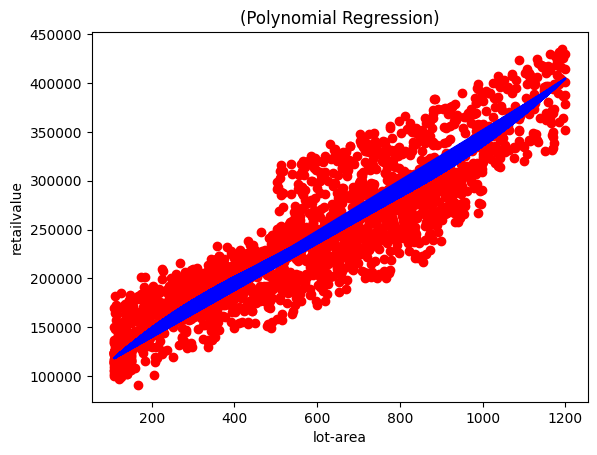

In [168]:
#2d Univariate Polynomial
######################################################### Poly
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('(Polynomial Regression)')
    plt.xlabel('lot-area')
    plt.ylabel('retailvalue')
    plt.show()
    return
viz_polymonial()

# Bivariate Polynomial Regression 


# Select features

In [169]:
X = df[['lot-area','taxvalue']] # predictor 

y = df.iloc[:,0].values # target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [170]:
X = df[['lot-area','taxvalue']].values.reshape(-1,2) # predictor 

Y = df.iloc[:,0].values # target

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Degree 2

In [171]:
time0 = time.time()
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 2)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  2
intercept_: 43993.93153636533
coef_: [ 0.00000000e+00  8.43935814e+00  9.33635982e-01  5.98414773e-02
 -3.58846975e-04  8.51114425e-07]

MAE:  7682
MSE:  97807037
RMSE:  9890
R^2 :  0.9859
Time:  0.018610477447509766


# Degree 3

In [172]:
time0 = time.time()
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 3)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  3
intercept_: 122.14434605589486
coef_: [ 0.00000000e+00 -2.79292911e+02  2.49440858e+00 -2.40876042e-01
  4.32631926e-03 -1.40066541e-05  7.34741136e-05  5.58016408e-07
 -1.22162767e-08  3.52610033e-11]

MAE:  7509
MSE:  94201740
RMSE:  9706
R^2 :  0.9864
Time:  0.02237844467163086


# Degree 4

In [173]:
time0 = time.time()
poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 4)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  4
intercept_: 74018.81875617182
coef_: [ 0.00000000e+00 -6.63762266e-06  3.78057675e-07 -5.50944204e-06
 -9.98135192e-04  1.27833565e-05 -6.49001540e-04  5.79766388e-06
 -6.55888069e-09 -5.22476369e-11 -6.14878651e-07  1.11259811e-08
 -6.54031247e-11  1.31959988e-13 -6.91261045e-18]

MAE:  7614
MSE:  96022552
RMSE:  9799
R^2 :  0.9862
Time:  0.024842262268066406


# Degree 5

In [174]:
time0 = time.time()
poly = PolynomialFeatures(5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 5)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  5
intercept_: 101728.52428268109
coef_: [ 0.00000000e+00  4.68805180e-11  7.43114900e-14 -4.94906424e-17
 -4.51939226e-14  2.13733506e-12 -1.27111991e-13 -2.22675758e-11
 -3.88664299e-09  7.48464687e-11 -3.76906187e-11 -3.10258441e-09
  3.03722322e-11 -5.86454160e-14 -3.24256791e-16 -2.39782361e-09
  3.62762472e-11 -2.00829469e-13  4.90370258e-16 -5.62643933e-19
  7.79924294e-22]

MAE:  8194
MSE:  106636750
RMSE:  10327
R^2 :  0.9846
Time:  0.02619147300720215


# Degree 6

In [175]:
time0 = time.time()
poly = PolynomialFeatures(6)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 6)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  6
intercept_: 119297.02193542758
coef_: [-9.74733368e-22 -3.57139739e-20  4.44871579e-24  1.86309567e-26
 -1.08755084e-26  2.59414467e-26  1.87365903e-28  5.01197894e-26
  1.38800540e-23  3.79401969e-21  6.89405658e-26  1.72186246e-23
  4.49432068e-21  1.23521364e-18  3.50031693e-16  1.35386532e-23
  2.27945733e-21  3.15554414e-19  2.79754415e-17 -1.65307758e-19
 -1.63266530e-21 -1.29370891e-22 -3.54035881e-20 -3.82651100e-18
  6.39758079e-20 -4.67359986e-22  1.47587002e-24  1.04676320e-27]

MAE:  10074
MSE:  155447823
RMSE:  12468
R^2 :  0.9776
Time:  0.04253530502319336


# Degree 7

In [176]:
time0 = time.time()
poly = PolynomialFeatures(7)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 7)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  7
intercept_: 130844.095295324
coef_: [ 7.69922643e-27 -2.48192090e-26 -2.39144160e-30 -2.69480563e-31
  6.49005320e-33 -1.89625606e-35 -1.29827841e-35  2.44503123e-36
  4.96149873e-34  1.36473735e-31  3.19116258e-36  8.63694037e-34
  2.39475690e-31  6.77950672e-29  1.92706326e-26  1.28594149e-33
  3.21628589e-31  8.27801630e-29  2.21590394e-26  6.20157207e-24
  1.79222651e-21  2.99541366e-31  5.60453383e-29  9.45053843e-27
  1.31656334e-24  1.18751015e-22 -6.83167703e-25 -9.11554519e-27
  1.56190659e-29  1.28610677e-27  4.17746408e-26 -3.92212399e-24
  1.59510238e-25 -1.70738621e-27  6.25423399e-30  7.35616431e-33]

MAE:  13627
MSE:  270536312
RMSE:  16448
R^2 :  0.9610
Time:  0.035684823989868164


# Degree 8

In [177]:
time0 = time.time()
poly = PolynomialFeatures(8)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 8)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  8
intercept_: 140358.72186807997
coef_: [ 8.90826260e-32  5.40661824e-30  1.87067697e-33  4.60966036e-36
  8.77000820e-38  2.54256498e-39 -4.48283436e-40 -1.79366203e-43
  1.79411799e-42  2.20965808e-42  3.39710252e-47  1.49669898e-44
  5.38963134e-42  1.80083962e-39  5.84192804e-37  5.03046523e-45
  5.33729519e-42  2.26233336e-39  7.93753061e-37  2.61279373e-34
  8.48616062e-32 -8.46249545e-42  3.35802290e-40  5.62181778e-37
  2.35913154e-34  7.97592508e-32  2.54573434e-29  8.23996391e-27
 -1.03911459e-38 -1.27800879e-36 -1.10024161e-34  9.69019065e-34
  2.72726810e-30  4.97120203e-28 -2.64855231e-30 -4.39955616e-32
 -3.37316136e-36 -3.36957816e-34 -2.52755513e-32 -1.04651323e-30
  8.40321684e-30  3.88063637e-31 -6.18115957e-33  2.46859741e-35
  4.03042417e-38]

MAE:  18059
MSE:  455299494
RMSE:  21338
R^2 :  0.9344
Time:  0.03571009635925293


# Degree 9

In [178]:
time0 = time.time()
poly = PolynomialFeatures(9)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 9)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  9
intercept_: 148599.97667020038
coef_: [ 4.07539208e-37 -2.93116029e-36 -1.35463879e-38 -1.65952821e-41
 -2.27773407e-42 -2.83157788e-45 -4.74532669e-47  1.36845553e-48
  0.00000000e+00  0.00000000e+00  1.25276148e-57  4.33523254e-55
  1.41024720e-52  4.44187643e-50  1.36855883e-47  6.16206759e-55
  2.31913905e-52  7.79981827e-50  2.49500949e-47  7.80296182e-45
  2.41458641e-42  2.12993721e-52  1.00826337e-49  3.63427060e-47
  1.18592498e-44  3.71298596e-42  1.14743617e-39  3.54986533e-37
 -8.50905695e-51  2.47121556e-47  1.15692761e-44  4.00650585e-42
  1.24966256e-39  3.75877642e-37  1.13277248e-34  3.49716686e-32
 -8.54516325e-47 -7.93733769e-45  1.05622186e-43  2.95985164e-40
  9.17050481e-38  1.82750196e-35  2.16985429e-33 -1.08496583e-35
 -1.90504988e-37 -4.34550865e-44 -4.99161711e-42 -4.96103701e-40
 -4.12950386e-38 -2.83212284e-36 -1.49180110e-34  3.45385399e-36
 -3.29680659e-38  1.14502468e-40  1.72473871e-43]

MAE:  22632
MSE:  693128657
RMSE:  26327
R^2 :  0.9001


# Degree 10

In [179]:
time0 = time.time()
poly = PolynomialFeatures(10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

print("")
print("Degree ", 10)
print("intercept_:", regressor.intercept_)
print("coef_:", regressor.coef_)

print("")
print("MAE: ", "{:.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: ", "{:.0f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 : ', "{:.4f}".format(metrics.r2_score(y_test, y_pred)))

time1 = time.time()
print("Time: ",time1-time0)


Degree  10
intercept_: 155896.1115289938
coef_: [ 1.13364174e-42  6.71631913e-41 -3.08566598e-44 -6.92913716e-47
 -4.44365474e-47  7.15889178e-51 -6.66904469e-51  1.04404871e-53
  4.17619486e-53  0.00000000e+00  2.17393035e-68  7.85170171e-66
  2.61704571e-63  8.34773505e-61  2.57860228e-58  1.20442048e-65
  4.71600372e-63  1.62685947e-60  5.29266517e-58  1.66932217e-55
  5.15793713e-53  5.44198340e-63  2.51361239e-60  9.15017334e-58
  3.03625707e-55  9.65237593e-53  3.00696464e-50  9.26397979e-48
  1.30148197e-60  1.06458876e-57  4.35033571e-55  1.49214827e-52
  4.76433465e-50  1.47608307e-47  4.53167599e-45  1.39070879e-42
 -8.82642809e-58  2.16945056e-55  1.41938726e-52  5.33165292e-50
  1.71143065e-47  5.16175950e-45  1.52962209e-42  4.57659125e-40
  1.39888322e-37 -1.49606062e-54 -1.44871970e-52  1.00352016e-51
  5.55197373e-48  1.91216544e-45  4.52236213e-43  7.92390133e-41
  8.53199806e-39 -4.02788758e-41 -7.73641087e-43 -8.36719703e-52
 -1.07362273e-49 -1.31863740e-47 -1.61754

# Logistic Regression


In [180]:
df[['retailvalue']].describe()

,retailvalue
count,2499.000000
mean,219054.821929
std,81895.336086
min,91000.000000
25%,137000.000000
50%,212000.000000
75%,282000.000000
max,435000.000000


In [181]:
def priceLogistic(x):
  if x['retailvalue'] > 212000:
    return 1
  return 0
df.apply(priceLogistic, axis=1)

0       1
1       0
2       1
3       1
4       1
       ..
2494    1
2495    1
2496    1
2497    0
2498    1
Length: 2499, dtype: int64

In [182]:
df['priceLogistic'] = df.apply(priceLogistic, axis=1)

In [183]:
df.head(10)

,retailvalue,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,energy-eff,monument,priceLogistic
0,232000,3520,35.1,14.2,499,147,406,1,2192,5470,1978,2,173100,0,0,1
1,184000,3520,22.2,18.2,404,109,328,1,2059,5228,1981,1,136000,0,1,0
2,230000,3520,59.7,11.8,704,89,629,1,2243,5388,1972,1,169000,0,0,1
3,257000,3520,39.0,18.6,726,130,669,1,2050,5432,1970,2,196900,0,0,1
4,286000,3520,44.2,18.1,800,160,750,0,2138,5110,1978,2,226000,0,0,1
5,185000,3520,16.8,11.4,192,154,124,0,2194,5214,1972,2,131200,0,0,0
6,182000,3520,6.7,16.5,111,159,19,0,2381,5378,1972,1,122100,0,0,0
7,184000,3520,17.4,14.4,250,139,180,1,2083,5292,1974,1,130900,0,0,0
8,266000,3520,48.8,17.4,849,115,796,1,2140,5192,1976,1,206400,0,0,1
9,280000,3520,76.3,11.6,885,118,793,0,2349,5240,1985,1,213600,0,1,1


# Univariate

In [184]:
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target
time0 = time.time()
model = LogisticRegression(solver='liblinear', C=1.0, random_state=0)
model.fit(X, y)

print("Intercept: ", model.intercept_)
print("Coef: ", model.coef_)
print("Result: ", model.predict(X))
print("Score: ", model.score(X, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X))
print(cr)


Intercept:  [-6.56699663]
Coef:  [[0.01327895]]
Result:  [1 0 1 ... 0 0 1]
Score:  0.9327731092436975
Time:  0.0164031982421875
confusion_matrix:
[[1146  110]
 [  58 1185]]
classification_report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1256
           1       0.92      0.95      0.93      1243

    accuracy                           0.93      2499
   macro avg       0.93      0.93      0.93      2499
weighted avg       0.93      0.93      0.93      2499



# Bivariate

In [185]:
X = df[['lot-area','taxvalue']] # predictor

y = df['priceLogistic'] # target
time0 = time.time()
model = LogisticRegression(solver='liblinear', C=1.0, random_state=0)
model.fit(X, y)

print("Intercept: ", model.intercept_)
print("Coef: ", model.coef_)
print("Result: ", model.predict(X))
print("Score: ", model.score(X, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X))
print(cr)
 

Intercept:  [-0.00012213]
Coef:  [[ 1.36935190e-02 -3.60889181e-05]]
Result:  [1 1 1 ... 1 0 1]
Score:  0.8339335734293718
Time:  0.015445947647094727
confusion_matrix:
[[ 996  260]
 [ 155 1088]]
classification_report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1256
           1       0.81      0.88      0.84      1243

    accuracy                           0.83      2499
   macro avg       0.84      0.83      0.83      2499
weighted avg       0.84      0.83      0.83      2499



# Selecting variables for Ridge, Lasso and ElasticNet

In [186]:
X = df[['lot-area']]
y = df['retailvalue']

# Ridge


In [187]:
rmodel = Ridge(alpha=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
time0 = time.time()

rmodel.fit(X_train,y_train)
y_pred = rmodel.predict(X_test)
mse = np.mean((y_pred-y_test)**2)
print("MSE: ", mse)

time1 = time.time()
print("Time: ",time1-time0)

MSE:  805103008.21768
Time:  0.006439685821533203


# Lasso

In [188]:

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

from sklearn.linear_model import Lasso
time0 = time.time()
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_poly, y)

print(model_lasso.score(X_poly, y))
time1 = time.time()
print("Time: ",time1-time0)

0.8732353212041651
Time:  0.004304409027099609


# ElasticNet

In [189]:

time0 = time.time()
EN = ElasticNet(alpha=1.0, l1_ratio=0.5)
EN = EN.fit(X, y)
y_pred = EN.predict(X)

print("Score eLastic : ",EN.score(X,y))

time1 = time.time()
print("Time: ",time1-time0)

Score eLastic :  0.8732353211831004
Time:  0.010235071182250977


# HOMEWORK 2


# KNN

In [190]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold, cross_val_score
from statistics import mean

In [191]:
y = df.iloc[:,0].values # target

X = df[['lot-area']] # predictor 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [192]:
time0 = time.time()

regressor = KNeighborsClassifier(n_neighbors=3)
regressor = regressor.fit(X_train, y_train)

y_pred= regressor.predict(X_test)



print("")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 : ', metrics.r2_score(y_test, y_pred))


time1 = time.time()
print("Time: ",time1-time0)


MAE:  30992.0
MSE:  1818549333.3333333
RMSE:  42644.45255051744
R^2 :  0.7378294772289729
Time:  0.06321978569030762


cross_validation

In [193]:

cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(regressor,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.73523295 0.73816774 0.7665821  0.74091509 0.72676087]


Mean 

0.741531751115086


# SVC


In [194]:
from sklearn.svm import LinearSVC , SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [195]:
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target


linear


In [196]:
from sklearn.svm import LinearSVC , SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

time0 = time.time()
model= Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC(C=1, loss="hinge")),])

model.fit(X, y)


print("Result: ", model.predict(X))
print("Score: ", model.score(X, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X))
print(cr)

Result:  [1 0 1 ... 0 0 1]
Score:  0.9295718287314926
Time:  0.015386343002319336
confusion_matrix:
[[1136  120]
 [  56 1187]]
classification_report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1256
           1       0.91      0.95      0.93      1243

    accuracy                           0.93      2499
   macro avg       0.93      0.93      0.93      2499
weighted avg       0.93      0.93      0.93      2499



cross_validation

In [197]:

cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.664      0.67997952 0.77594264 0.75999616 0.73541888]


Mean 

0.7230674391743643


In [198]:
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

poly

In [199]:

time0 = time.time()
model= Pipeline([ ("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])

model.fit(X, y)


print("Result: ", model.predict(X))
print("Score: ", model.score(X, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X))
print(cr)

Result:  [1 0 1 ... 1 0 1]
Score:  0.9211684673869548
Time:  0.14380574226379395
confusion_matrix:
[[1102  154]
 [  43 1200]]
classification_report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1256
           1       0.89      0.97      0.92      1243

    accuracy                           0.92      2499
   macro avg       0.92      0.92      0.92      2499
weighted avg       0.92      0.92      0.92      2499



cross_validation

In [200]:

cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.664      0.63997696 0.76794059 0.67199475 0.67929561]


Mean 

0.6846415820836903


In [201]:
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

radial basis function

In [202]:

time0 = time.time()
model= Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])

model.fit(X, y)


print("Result: ", model.predict(X))
print("Score: ", model.score(X, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X))
print(cr)

Result:  [0 0 1 ... 0 0 1]
Score:  0.8919567827130852
Time:  1.250969409942627
confusion_matrix:
[[1183   73]
 [ 197 1046]]
classification_report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1256
           1       0.93      0.84      0.89      1243

    accuracy                           0.89      2499
   macro avg       0.90      0.89      0.89      2499
weighted avg       0.90      0.89      0.89      2499



cross_validation

In [203]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [-0.112       0.04793907 -0.05627041  0.0559849   0.01383399]


Mean 

-0.010102489854037078


# SVR

linear


In [204]:
y = df.iloc[:,0].values # target

X = df[['lot-area']] # predictor 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [205]:
from sklearn.svm import LinearSVR
time0 = time.time()
regressor= LinearSVR(epsilon=1.5)
regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)

print("")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 : ', metrics.r2_score(y_test, y_pred))


time1 = time.time()
print("Time: ",time1-time0)


MAE:  49937.29615596176
MSE:  3348808474.35345
RMSE:  57868.8903846743
R^2 :  0.5172202082788571
Time:  0.01723623275756836


cross_validation

In [206]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(regressor,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.43115356 0.43868624 0.4794882  0.52968699 0.46988006]


Mean 

0.469779008793082


poly

In [207]:
from sklearn.svm import SVR
time0 = time.time()
regressor= SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)

print("")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 : ', metrics.r2_score(y_test, y_pred))


time1 = time.time()
print("Time: ",time1-time0)



MAE:  26350.96539547016
MSE:  1128230517.6764596
RMSE:  33589.14285414946
R^2 :  0.8373490456355703
Time:  0.14835214614868164


cross_validation

In [208]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(regressor,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.8128313  0.7818608  0.82083026 0.82747687 0.81741196]


Mean 

0.8120822381083886


----------------------------------------------------

radial basis function

In [209]:
from sklearn.svm import SVR
time0 = time.time()
regressor= SVR(kernel="rbf",gamma=5, C=0.001)
regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)

print("")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 : ', metrics.r2_score(y_test, y_pred))


time1 = time.time()
print("Time: ",time1-time0)


MAE:  70437.32979032413
MSE:  7020078573.356591
RMSE:  83785.90915754624
R^2 :  -0.012047149744953023
Time:  0.21212506294250488


cross_validation

In [210]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(regressor,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [-0.00902752 -0.01354    -0.00143056 -0.02130689 -0.00728011]


Mean 

-0.010517013641642814


--------------------------------------


Nystroem

In [211]:
from sklearn.kernel_approximation import Nystroem

linear

In [212]:
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [213]:
from sklearn.svm import LinearSVC , SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

time0 = time.time()
fm=Nystroem(kernel='poly',gamma=1.0, n_components=100)
X_transformed = fm.fit_transform(X)
model= Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC(C=1, loss="hinge")),])

model.fit(X_transformed, y)


print("Result: ", model.predict(X_transformed))
print("Score: ", model.score(X_transformed, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X_transformed))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X_transformed))
print(cr)

Result:  [0 0 1 ... 0 0 1]
Score:  0.9267707082833133
Time:  0.16744542121887207
confusion_matrix:
[[1158   98]
 [  85 1158]]
classification_report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1256
           1       0.92      0.93      0.93      1243

    accuracy                           0.93      2499
   macro avg       0.93      0.93      0.93      2499
weighted avg       0.93      0.93      0.93      2499



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [214]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.664      0.67997952 0.77594264 0.75999616 0.73541888]


Mean 

0.7230674391743643


poly


In [215]:
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [216]:

from sklearn.svm import LinearSVC , SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

time0 = time.time()
fm=Nystroem(kernel='rbf',gamma=1.0, n_components=100)
X_transformed = fm.fit_transform(X)
model= Pipeline([ ("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])

model.fit(X_transformed, y)


print("Result: ", model.predict(X_transformed))
print("Score: ", model.score(X_transformed, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X_transformed))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X_transformed))
print(cr)


Result:  [1 1 1 ... 1 0 1]
Score:  0.7735094037615046
Time:  0.6935691833496094
confusion_matrix:
[[ 700  556]
 [  10 1233]]
classification_report:
              precision    recall  f1-score   support

           0       0.99      0.56      0.71      1256
           1       0.69      0.99      0.81      1243

    accuracy                           0.77      2499
   macro avg       0.84      0.77      0.76      2499
weighted avg       0.84      0.77      0.76      2499



In [217]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.664      0.63997696 0.76794059 0.67199475 0.67929561]


Mean 

0.6846415820836903


radial basis function

In [218]:
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [219]:

from sklearn.svm import LinearSVC , SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

time0 = time.time()
fm=Nystroem(kernel='rbf',gamma=1.0, n_components=100)
X_transformed = fm.fit_transform(X)
model= Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])

model.fit(X_transformed, y)


print("Result: ", model.predict(X_transformed))
print("Score: ", model.score(X_transformed, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X_transformed))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X_transformed))
print(cr)


Result:  [0 0 0 ... 0 0 0]
Score:  0.5026010404161665
Time:  3.486034870147705
confusion_matrix:
[[1256    0]
 [1243    0]]
classification_report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1256
           1       0.00      0.00      0.00      1243

    accuracy                           0.50      2499
   macro avg       0.25      0.50      0.33      2499
weighted avg       0.25      0.50      0.34      2499



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [220]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [-0.112       0.04793907 -0.05627041  0.0559849   0.01383399]


Mean 

-0.010102489854037078


# Decision Trees


Regression


In [221]:
from sklearn.tree import DecisionTreeRegressor
y = df.iloc[:,0].values # target

X = df[['lot-area']] # predictor 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [222]:
time0 = time.time()
regressor= DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)

print("")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 : ', metrics.r2_score(y_test, y_pred))


time1 = time.time()
print("Time: ",time1-time0)


MAE:  27049.060589301764
MSE:  1405966591.9032333
RMSE:  37496.22103496875
R^2 :  0.7973093225234453
Time:  0.010043144226074219


In [223]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(regressor,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.80280485 0.79619226 0.83031905 0.81129357 0.8015902 ]


Mean 

0.808439986203505


Classification (training with gini)

In [224]:
from sklearn.tree import DecisionTreeClassifier

In [225]:
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target


In [226]:

time0 = time.time()
model= DecisionTreeClassifier(criterion = "gini",  random_state= 100,max_depth=3, min_samples_leaf=5) 

model.fit(X, y)


print("Result: ", model.predict(X))
print("Score: ", model.score(X, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X))
print(cr)

Result:  [1 0 1 ... 0 0 1]
Score:  0.933173269307723
Time:  0.010680437088012695
confusion_matrix:
[[1147  109]
 [  58 1185]]
classification_report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1256
           1       0.92      0.95      0.93      1243

    accuracy                           0.93      2499
   macro avg       0.93      0.93      0.93      2499
weighted avg       0.93      0.93      0.93      2499



In [227]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.672      0.68798003 0.75993854 0.79199667 0.73541888]


Mean 

0.7294668245727879


Tree Visualization

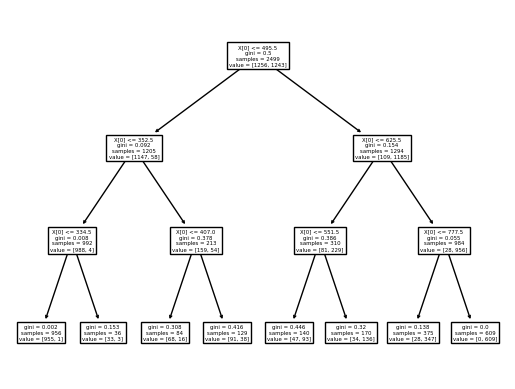

In [228]:
from sklearn import tree
tree.plot_tree(model)
plt.show()

Classification (training with entropy)

In [229]:
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target


In [230]:

time0 = time.time()
model= DecisionTreeClassifier( criterion = "entropy", random_state= 100, max_depth= 3, min_samples_leaf= 5) 

model.fit(X, y)


print("Result: ", model.predict(X))
print("Score: ", model.score(X, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X))
print(cr)

Result:  [1 0 1 ... 0 0 1]
Score:  0.933173269307723
Time:  0.011295318603515625
confusion_matrix:
[[1147  109]
 [  58 1185]]
classification_report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1256
           1       0.92      0.95      0.93      1243

    accuracy                           0.93      2499
   macro avg       0.93      0.93      0.93      2499
weighted avg       0.93      0.93      0.93      2499



In [231]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.672      0.68798003 0.77594264 0.79199667 0.73541888]


Mean 

0.7326676439825568


Tree Visualization

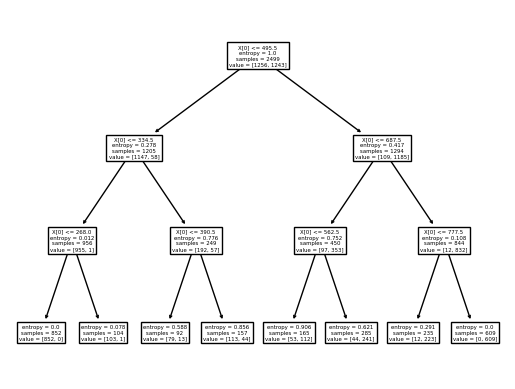

In [232]:
from sklearn import tree
tree.plot_tree(model)
plt.show()

# Random Forest


Regression


In [233]:
from sklearn.ensemble import RandomForestRegressor
y = df.iloc[:,0].values # target

X = df[['lot-area']] # predictor 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [234]:
time0 = time.time()
regressor= RandomForestRegressor(max_depth=2, random_state=0)
regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)

print("")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 : ', metrics.r2_score(y_test, y_pred))


time1 = time.time()
print("Time: ",time1-time0)


MAE:  25055.504743625657
MSE:  1146603231.4586546
RMSE:  33861.5302586675
R^2 :  0.8347003498379306
Time:  0.16644501686096191


In [235]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(regressor,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.84668132 0.81888612 0.85988378 0.86046315 0.83306976]


Mean 

0.8437968261410418


Classification

In [236]:
from sklearn.ensemble import RandomForestClassifier
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target


In [237]:

time0 = time.time()
model= RandomForestClassifier(n_estimators=100)

model.fit(X, y)


print("Result: ", model.predict(X))
print("Score: ", model.score(X, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X))
print(cr)

Result:  [1 0 1 ... 0 0 1]
Score:  0.952781112444978
Time:  0.3152439594268799
confusion_matrix:
[[1174   82]
 [  36 1207]]
classification_report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1256
           1       0.94      0.97      0.95      1243

    accuracy                           0.95      2499
   macro avg       0.95      0.95      0.95      2499
weighted avg       0.95      0.95      0.95      2499



In [238]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.584      0.60797491 0.69592216 0.68799501 0.71938366]


Mean 

0.6590551461347004


# PCA


# Kernel PCA

In [239]:
from sklearn.ensemble import RandomForestClassifier
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target
from sklearn.decomposition import KernelPCA

In [240]:
kPCA = KernelPCA(n_components=3, kernel='rbf', gamma=1.0)

In [241]:
X=kPCA.fit_transform(X)

In [242]:

time0 = time.time()
model= RandomForestClassifier(n_estimators=100)

model.fit(X, y)


print("Result: ", model.predict(X))
print("Score: ", model.score(X, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X))
print(cr)

Result:  [1 0 1 ... 1 0 1]
Score:  0.9467787114845938
Time:  0.49223828315734863
confusion_matrix:
[[1161   95]
 [  38 1205]]
classification_report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1256
           1       0.93      0.97      0.95      1243

    accuracy                           0.95      2499
   macro avg       0.95      0.95      0.95      2499
weighted avg       0.95      0.95      0.95      2499



In [243]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.32       0.3359575  0.51187504 0.49599194 0.39867926]


Mean 

0.41250074812675497


# TSNE

In [244]:
from sklearn.manifold import TSNE



In [245]:
from sklearn.ensemble import RandomForestClassifier
X = df[['lot-area']] # predictor

y = df['priceLogistic'] # target


In [246]:
X=TSNE(n_components=2,learning_rate='auto',init='random').fit_transform(X)

In [247]:

time0 = time.time()
model= RandomForestClassifier(n_estimators=100)

model.fit(X, y)


print("Result: ", model.predict(X))
print("Score: ", model.score(X, y))

time1 = time.time()
print("Time: ",time1-time0)

print("confusion_matrix:")
cm = confusion_matrix(y, model.predict(X))
print(cm)
print("classification_report:")
cr = classification_report(y, model.predict(X))
print(cr)

Result:  [1 0 1 ... 1 0 1]
Score:  0.9635854341736695
Time:  0.3649451732635498
confusion_matrix:
[[1192   64]
 [  27 1216]]
classification_report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1256
           1       0.95      0.98      0.96      1243

    accuracy                           0.96      2499
   macro avg       0.96      0.96      0.96      2499
weighted avg       0.96      0.96      0.96      2499



In [248]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(model,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.6        0.60797491 0.7039242  0.64799437 0.63920756]


Mean 

0.6398202081968029


In [249]:
# tSVD - Works with sparse matrices — used with text data for Latent Semantic Analysis (LSA).

# PCA plot

In [250]:
X =df[df.columns.difference(['retailvalue'])]
y = df['priceLogistic'] # target

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [252]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [253]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [254]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)
#LogisticRegression(random_state = 0)
#RandomForestClassifier(n_estimators=100)

LogisticRegression(random_state=0)

In [255]:
y_pred = classifier.predict(X_test)

In [256]:
time0 = time.time()

print("")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 : ', metrics.r2_score(y_test, y_pred))


time1 = time.time()
print("Time: ",time1-time0)


MAE:  0.012
MSE:  0.012
RMSE:  0.10954451150103323
R^2 :  0.9519992319877117
Time:  0.007677793502807617


In [257]:
cv =  KFold(n_splits=5,shuffle=False)
scores = cross_val_score(classifier,X,y,scoring='r2',cv=cv,n_jobs=-1)
print("r2: ", scores)
print('\n')
print('Mean \n')
print(mean(scores))

r2:  [0.856      0.87999232 0.92798156 0.95199923 0.89577107]


Mean 

0.9023488374223179


In [258]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

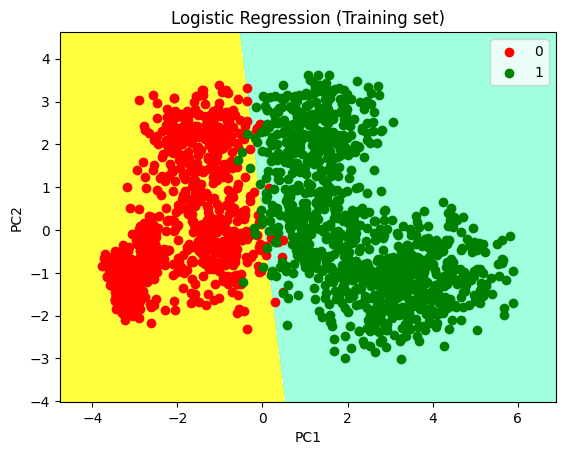

In [259]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend()


plt.show()

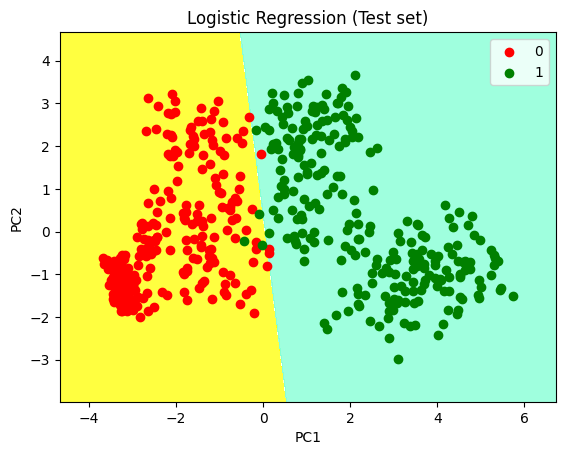

In [260]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)


plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend()


plt.show()

# TSNE plot

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [262]:

labels = df['priceLogistic']
data = df.drop("priceLogistic", axis = 1)


In [263]:

from sklearn.preprocessing import StandardScaler
 
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(2499, 15)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


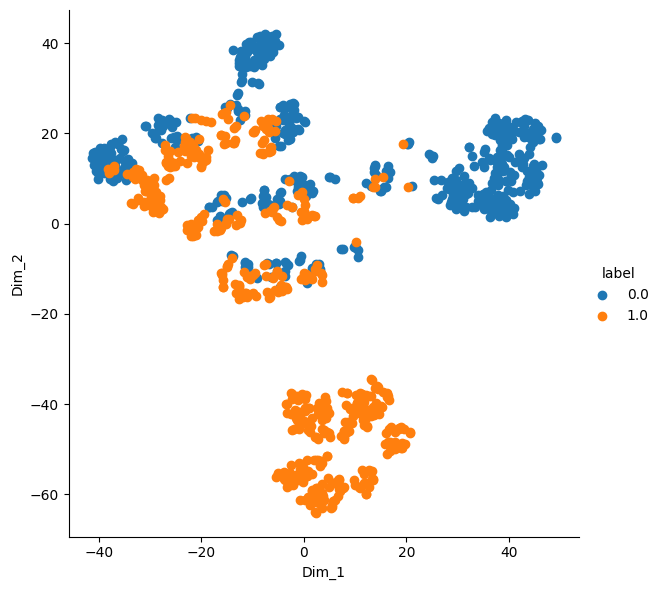

In [264]:

data_1000 = standardized_data[0:1000, :]
labels_1000 = labels[0:1000]

model = TSNE(n_components = 2, random_state = 0)


tsne_data = model.fit_transform(data_1000)


tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
	columns =("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue ="label", size = 6).map(
	plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.show()


# KMeans & Agglomerative

In [265]:
df1=df

In [266]:
X =df[df.columns.difference(['retailvalue'])]
y = df['priceLogistic'] # target

[[ 9.04841402e-01  1.49749583e+00  1.99782304e+03  8.34724541e-02
   8.06714524e+02  1.90470785e+02  8.81971619e+02  6.08786311e+01
   1.50599332e+01  3.88981636e-01  1.00000000e+00  2.73455259e+05
   2.75774457e+03  5.29161603e+03  3.76157763e+03]
 [ 8.10924370e-01  1.07773109e+00  1.99411450e+03  5.74579832e-01
   9.93319328e+01  1.05251050e+02  1.74632353e+02  1.22365546e+01
   1.48691176e+01  3.15126050e-02 -6.32827124e-15  9.21788866e+04
   2.50108298e+03  5.64263235e+03  3.52588761e+03]
 [ 5.56962025e-01  1.34282700e+00  1.98725527e+03  1.19198312e-01
   5.28113924e+02  1.37771097e+02  6.03121308e+02  4.15024262e+01
   1.50656118e+01  2.50000000e-01  6.79324895e-01  1.83001899e+05
   2.51513608e+03  5.48668882e+03  3.55306435e+03]]


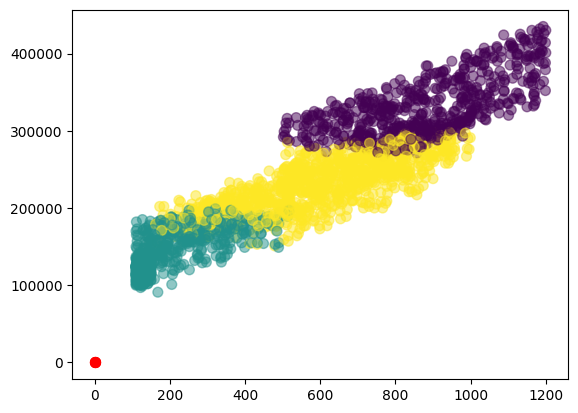

In [267]:
from sklearn.cluster import KMeans
from pandas import DataFrame
#df= DataFrame(df,columns=['land_size_sqm','house_size_sqm'])
kmeans= KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(X['lot-area'], df['retailvalue'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[1 1 1 ... 1 2 1]


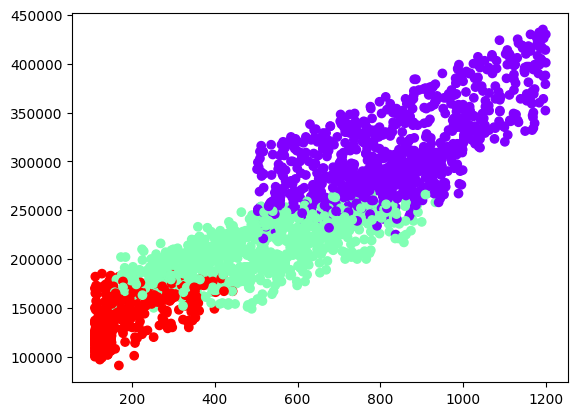

In [268]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
cluster.fit_predict(X)
print(cluster.labels_)
plt.scatter(df['lot-area'],df['retailvalue'], c=cluster.labels_, cmap='rainbow')

In [269]:


X =df1[df1.columns.difference(['retailvalue'])]
#y = df['priceLogistic'] # target

[[ 2.28398472e+05  3.55258734e+03  4.03125546e+01  1.50329694e+01
   5.84103712e+02  1.37173581e+02  5.09267467e+02  5.56768559e-01
   2.50907424e+03  5.48153821e+03  1.98721288e+03  1.34497817e+00
   1.79779803e+05  1.16812227e-01  2.48908297e-01  6.49563319e-01]
 [ 1.34040642e+05  3.52606952e+03  1.21089840e+01  1.48652406e+01
   1.72643850e+02  1.05049198e+02  9.70962567e+01  8.16042781e-01
   2.51579572e+03  5.65806952e+03  1.99461818e+03  1.07272727e+00
   9.15539037e+04  5.87165775e-01  2.88770053e-02 -6.21724894e-15]
 [ 3.28513889e+05  3.74550926e+03  6.05117284e+01  1.51069444e+01
   8.79396605e+02  1.86768519e+02  8.04265432e+02  8.78086420e-01
   2.72637037e+03  5.29546451e+03  1.99653704e+03  1.48302469e+00
   2.69689198e+05  8.33333333e-02  3.78086420e-01  1.00000000e+00]]


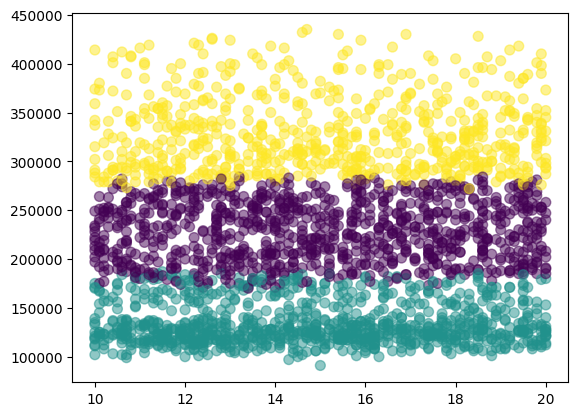

In [270]:
from sklearn.cluster import KMeans
from pandas import DataFrame
#df= DataFrame(df1)
kmeans= KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['lot-width'], df['retailvalue'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


[1 1 1 ... 1 2 1]


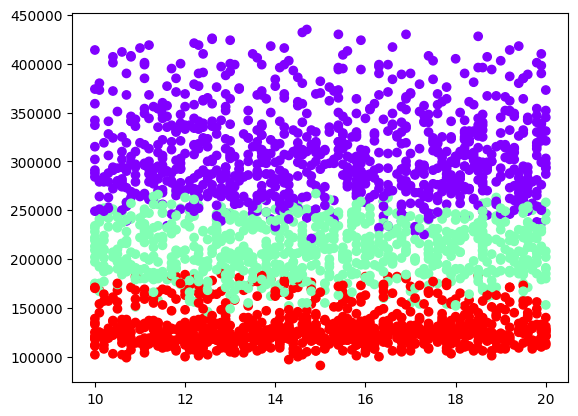

In [271]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
cluster.fit_predict(X)
print(cluster.labels_)
plt.scatter(df['lot-width'],df['retailvalue'], c=cluster.labels_, cmap='rainbow')

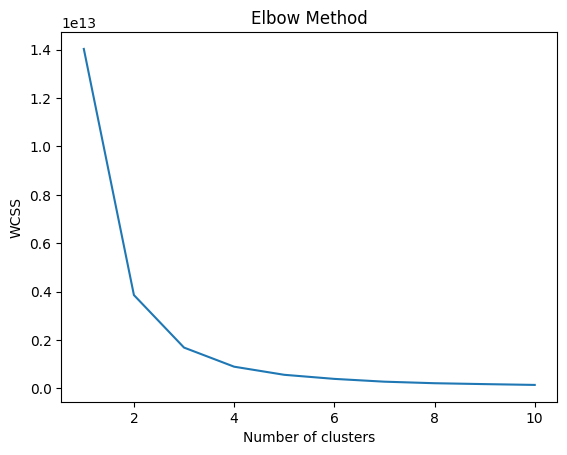

In [272]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # sum of squared distances of samples to their closest cluster center
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [273]:
'''X =df[df.columns.difference(['retailvalue'])]
y = df['retailvalue'] # target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))'''

'X =df[df.columns.difference([\'retailvalue\'])]\ny = df[\'retailvalue\'] # target\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n\nfrom xgboost import XGBClassifier\nclassifier = XGBClassifier()\nclassifier.fit(X_train, y_train)\n\nfrom sklearn.metrics import confusion_matrix, accuracy_score\ny_pred = classifier.predict(X_test)\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\naccuracy_score(y_test, y_pred)\n\nfrom sklearn.model_selection import cross_val_score\naccuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)\nprint("Accuracy: {:.2f} %".format(accuracies.mean()*100))\nprint("Standard Deviation: {:.2f} %".format(accuracies.std()*100))'